Ryan Brenner  
August 2018

![Alt Text](https://plus.efc.ny.gov/PLUS/Content/Environmental%20Facilities%20Corporation.png)

The purpose of this project is to examine trends in green infrastructure finance from the Environmental Facilities Corporation (EFC). EFC is a public benefit corporation that administers the New York State Revolving Funds for the Clean Water Act and Clean Drinking Water Act. In addition to many other financing options, the Green Innovation Grant Program (GIGP) provides grants on a competitive basis to projects that improve water quality and demonstrate green stormwater infrastructure. Previous GIGP awards for 2009-2016 are available [here](https://www.efc.ny.gov/gigp-previous-awards).

![Alt Text](https://togethernorthjersey.com/wp-content/uploads/2014/04/Green-Infrastructure-Strategy-for-the-City-of-Hoboken.jpg)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.style.use(['ggplot'])
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

After scraping the annual PDFs into an Excel spreadsheet, I manually read the project descriptions to code for the types of green infrastructure used in each project as well as the general location of the project.

Typologies Include: 
* **Permeable Pavements** - *Designed to convey rainfall through the pavement surface into an underlying reservoir where it can infiltrate, thereby reducing stormwater runoff from a site. Given appropriate soil and subsurface conditions, permeable pavements can be used in any type of development, for example: roads, parking lots, sidewalks, basketball and tennis courts, playgrounds, and plaza surfaces.*																		

* **Bioretention**	- *Bioretention systems are shallow vegetated depressions often referred to by a variety of names such as bioinfiltration areas, biofilters, rain gardens, bioswales, or recharge gardens. They are very effective at removing pollutants and reducing stormwater runoff. These systems are designed to collect water in the depression where it ponds on the surface and is then used by the vegetation in evapotranspiration and infiltrated into the soil.*																																			
* **Green Roofs/Walls**	- *Green Roofs consist of vegetation, growing media, and a drainage layer installed on top of a conventional flat or sloped roof. The rooftop vegetation soaks up rainwater where some of this water evaporates off the surface, some is used by the plants in evapotranspiration, and in larger storms a portion of the water will runoff. Green Walls are vertical systems which provide air quality and stormwater benefits, and can help to reduce energy usage. Plants can be rooted in the ground, or installed in modular containers, growing blocks or growing mats along the face of the structure.*																		
* **Street Trees/Urban Forestry** - *Stormwater street trees include engineered tree pits, tree boxes, and trenches designed to capture stormwater from the adjacent roadway and manage the stormwater through evapotranspiration and infiltration. Urban Forestry Programs use a detailed inventory and map of existing and proposed trees to manage and maintain their urban canopy. Implementing an Urban Forestry Program can provide water quality benefits in addition to numerous other benefits including: reducing energy usage by shading buildings in the summer to reduce thermal loads and blocking winter winds, providing wildlife habitat, sequestering carbon dioxide and other greenhouse gases, intercepting and absorbing pollutants through their leaves and branches.*																		
																		
* **Restoration of Floodplains** - *Floodplains are a natural water right-of-way that provide temporary storage for large flood event, keeping people and structures out of harm's way and preserving riparian ecosystems and habitats. Over time, people have filled in and built on floodplains thereby reducing nature's ability to cope with large rain events. Restoring floodplains helps provide safe storage of excess water in large storm events, reduces volume through infiltration and evaporation, and filters sediment and nutrients from the water before it reaches or re-enters the larger waterbody. Riparian Buffers are vegetated or undisturbed natural areas that filter runoff before it enters a waterbody. Riparian zones reduce sediment, nitrogen, phosphorous, pesticides and other pollutants by soaking the water and associated pollutants into the ground where some of these can be broken down. Healthy riparian buffers increase habitat, stabilize channels and banks, improve water quality, provides stream shade and temperature control and improve aesthetics. Stream Bank Stabilization uses bioengineering and soft redirected methods to rehabilitate streams to a more natural flow with an overarching goal of reducing erosion and destructive flows. Stream stabilization typically consists of vegetative improvements as well as the use of lock logs, stones, vanes, weirs and j-hooks where appropriate. Wetlands and constructed wetlands are shallow marsh systems planted with emergent vegetation that are designed to treat stormwater runoff. They are extremely effective for pollutant removal and can mitigate peak rates and reduce runoff volume. Constructed wetlands have considerable aesthetic and wildlife benefits and are a good option for retrofitting existing detention basins.*																		
																		
* **Stream Daylighting** - *Stream daylighting includes the removal of natural streams from artificial pipes and culverts to restore a more natural stream morphology that is capable fo accommodating a range of hydrologic conditions while improving biological integrity. Stream daylighting provides habitat, promotes infiltration, helps reduce pollutant loads and can provide better runoff attenuation because it increases the storage size of the natural system.*																		
* **Downspout Disconnection** - *The removal of runoff from a direct connection to a combined or storm sewer. Historically, many communities required that roofs have stormwater connected to the sewer to rapidly convey the water away from the structure.*																		
* **Stormwater Harvesting** - *Rain barrels are rooftop catchment storage systems typically utilized in residential settings while cisterns are large-scale rain barrels used in commercial and industrial settings. Rain barrels and cisterns capture and store stormwater runoff to be used later for lawn and landscaping irrigation, or water can be filtered and used for non-potable activities such as car washing or filling swimming pools.*							

Locations Indlue: 
* Open Space
* Residential Building
* Public Building
* Citywide
* Commercial Building
* Parking
* Waterbody
* Institutional Building
* Road

In [2]:
green_grants = pd.read_csv('efc_gigp.csv')
green_grants.head()

,Year,Fund,County,Applicant,Project,Description,Award,NYC,City,Location,...,Bioretention,Green_Roofs,Street_Trees,Restoration_Floodplains,Stream_Daylighting,Downspout_Disconnection,Stormwater_Harvesting,Unspecified_GI,Design_Only,Other
0,2016,Green Innovation Grant Program,Albany,Albany Water Board,Tivoli Lake Preserve Stream Daylighting,The Albany Water Board will daylight a portion...,1100000,0,Albany,Waterbody,...,0,0,0,1,1,0,0,0,0,0
1,2016,Green Innovation Grant Program,Broome,Broome County Broome County Arena,Rainwater Harvesting,Broome County will capture rainfall from the F...,1750000,0,Binghamton,Commercial Building,...,0,0,0,0,0,0,1,0,0,0
2,2016,Green Innovation Grant Program,Chautauqua,City of Jamestown,Tracy Plaza Green Renovations,The City of Jamestown will use green infrastru...,1480000,0,Jamestown,Commercial Building,...,0,1,0,0,0,0,1,0,0,0
3,2016,Green Innovation Grant Program,Jefferson,Southwick Beach State Park,Southwick Beach Green Retrofit,Southwick Beach State Park will restore dunes ...,1380000,0,Unknown,Waterbody,...,1,0,0,1,0,0,0,0,0,0
4,2016,Green Innovation Grant Program,Madison,Town of Sullivan,Bridgeport Green Streetscape,The Town of Sullivan will construct bioretenti...,800000,0,Sullivan,Road,...,1,0,1,0,0,0,0,0,0,0


### *Total Grant Amount by Year*

In [3]:
annual_total = green_grants.groupby('Year')['Award '].sum()
annual_total = pd.DataFrame(annual_total)
annual_total

,Award
Year,
2009,38206265
2010,15846279
2011,18117000
2012,15235105
2013,10400000
2014,12600000
2015,14850000
2016,10000000


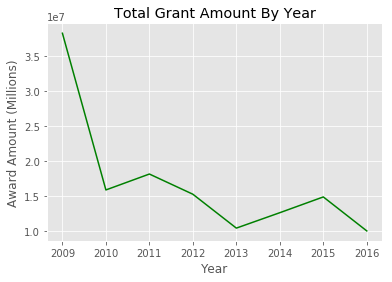

In [4]:
annual_total.plot(kind='line',legend=None,color='green') 

plt.title('Total Grant Amount By Year')
plt.ylabel('Award Amount (Millions)')
plt.xlabel('Year')

plt.show()

In [5]:
nyc_annual_total = green_grants[green_grants['NYC']==1].groupby('Year')['Award '].sum()
nyc_annual_total = pd.DataFrame(nyc_annual_total).reset_index()
add_list = pd.DataFrame([[2009, 0], [2010, 0], [2016, 0]], columns=['Year','Award '])
nyc_annual_total = add_list.append(nyc_annual_total).sort_values(by=['Year'])
nyc_annual_total = nyc_annual_total.set_index('Year')
nyc_annual_total

,Award
Year,
2009,0
2010,0
2011,5412000
2012,1735000
2013,778678
2014,882000
2015,1200000
2016,0


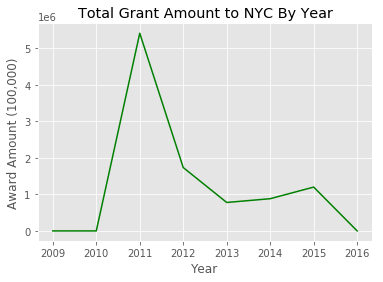

In [6]:
nyc_annual_total.plot(kind='line',legend=None,color='green') 

plt.title('Total Grant Amount to NYC By Year')
plt.ylabel('Award Amount (100,000)')
plt.xlabel('Year')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.show()

In [7]:
percent_nyc = annual_total.merge(nyc_annual_total,on='Year')
percent_nyc['Percent'] = round(((percent_nyc['Award _y'] / percent_nyc['Award _x']) * 100), 2)
percent_nyc = percent_nyc.reset_index()
percent_nyc[['Year','Percent']]

,Year,Percent
0,2009,0.00
1,2010,0.00
2,2011,29.87
3,2012,11.39
4,2013,7.49
5,2014,7.00
6,2015,8.08
7,2016,0.00


### *Total Grant Amount by County*

In [8]:
county_total = green_grants.groupby('County')['Award '].sum()
county_total = pd.DataFrame(county_total).reset_index()
county_total.head()

,County,Award
0,Albany,11230589
1,Bronx,3007000
2,Broome,3503125
3,Cattaraugus,854000
4,Cayuga,7121607


In [9]:
county_total.to_csv('county_total.csv')

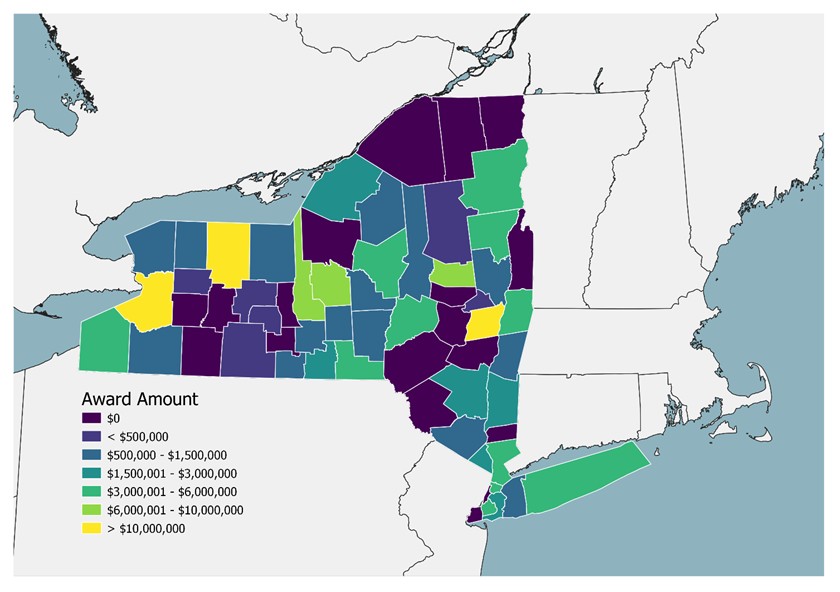

*GIS analysis conducted in QGIS*

### *Typology Analysis*

This is a count of the number of times each typology was funded by a grant. Most grants cover projects that include multiple typologies, so the total count for each of the typologies is greater than the number of grants. "Design_Only" and "Other" were dropped because this analysis is only for actual green infrastructure that has been completed: design only is just plans for green infrastructure and other is from when GIGP funded other types of "green" infrastructure like solar panels.

In [10]:
#Extracting just the actual GI grants
just_green = green_grants[np.logical_and(green_grants['Other']==0,green_grants['Design_Only']==0)]
just_green.head()

,Year,Fund,County,Applicant,Project,Description,Award,NYC,City,Location,...,Bioretention,Green_Roofs,Street_Trees,Restoration_Floodplains,Stream_Daylighting,Downspout_Disconnection,Stormwater_Harvesting,Unspecified_GI,Design_Only,Other
0,2016,Green Innovation Grant Program,Albany,Albany Water Board,Tivoli Lake Preserve Stream Daylighting,The Albany Water Board will daylight a portion...,1100000,0,Albany,Waterbody,...,0,0,0,1,1,0,0,0,0,0
1,2016,Green Innovation Grant Program,Broome,Broome County Broome County Arena,Rainwater Harvesting,Broome County will capture rainfall from the F...,1750000,0,Binghamton,Commercial Building,...,0,0,0,0,0,0,1,0,0,0
2,2016,Green Innovation Grant Program,Chautauqua,City of Jamestown,Tracy Plaza Green Renovations,The City of Jamestown will use green infrastru...,1480000,0,Jamestown,Commercial Building,...,0,1,0,0,0,0,1,0,0,0
3,2016,Green Innovation Grant Program,Jefferson,Southwick Beach State Park,Southwick Beach Green Retrofit,Southwick Beach State Park will restore dunes ...,1380000,0,Unknown,Waterbody,...,1,0,0,1,0,0,0,0,0,0
4,2016,Green Innovation Grant Program,Madison,Town of Sullivan,Bridgeport Green Streetscape,The Town of Sullivan will construct bioretenti...,800000,0,Sullivan,Road,...,1,0,1,0,0,0,0,0,0,0


In [11]:
#Printing columns to extract the GI typologies
just_green.columns

Index(['Year', 'Fund', 'County', 'Applicant', 'Project', 'Description',
       'Award ', 'NYC', 'City', 'Location', 'Permeable_Pavements',
       'Bioretention', 'Green_Roofs', 'Street_Trees',
       'Restoration_Floodplains', 'Stream_Daylighting',
       'Downspout_Disconnection', 'Stormwater_Harvesting ', 'Unspecified_GI',
       'Design_Only', 'Other'],
      dtype='object')

In [12]:
#Extracting the GI typologies into a list
green_typologies = ['Permeable_Pavements','Bioretention','Green_Roofs','Street_Trees','Restoration_Floodplains', 
                    'Stream_Daylighting','Downspout_Disconnection','Stormwater_Harvesting ','Unspecified_GI']

In [13]:
#Iterating over the list to count the occurence of each typology
typology_count = {}

for typology in green_typologies:
    count = just_green[typology].sum()
    typology_count[typology] = count

typology_count = pd.DataFrame.from_dict(typology_count,orient='index')
typology_count.columns = ['Count']
typology_count = typology_count.sort_values(by=['Count'])
typology_count

,Count
Unspecified_GI,3
Stream_Daylighting,5
Downspout_Disconnection,6
Restoration_Floodplains,24
Street_Trees,25
Stormwater_Harvesting,27
Green_Roofs,35
Bioretention,67
Permeable_Pavements,71


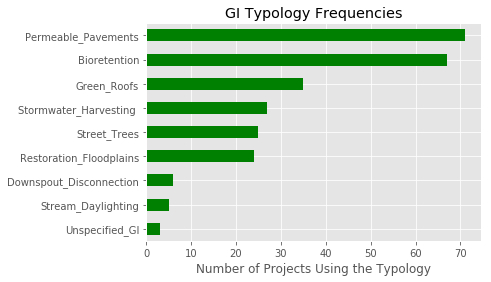

In [14]:
#Graphing results
typology_count.plot(kind='barh',color='green',legend=None)
 
plt.xlabel('Number of Projects Using the Typology')
plt.title('GI Typology Frequencies')

plt.show()

In [15]:
#Calculating total for a percent calculation
just_green.shape

(137, 21)

In [16]:
#Calculating the percent of projects using each typology
typology_count['Percent'] = round(((typology_count['Count'] / 137) * 100),2)
typology_count

,Count,Percent
Unspecified_GI,3,2.19
Stream_Daylighting,5,3.65
Downspout_Disconnection,6,4.38
Restoration_Floodplains,24,17.52
Street_Trees,25,18.25
Stormwater_Harvesting,27,19.71
Green_Roofs,35,25.55
Bioretention,67,48.91
Permeable_Pavements,71,51.82


In [17]:
#Regressing award amount by typology 
X = just_green[['Permeable_Pavements','Bioretention','Green_Roofs','Street_Trees','Restoration_Floodplains',
                'Stream_Daylighting','Downspout_Disconnection','Stormwater_Harvesting ','Unspecified_GI']]
y = just_green['Award ']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Award    R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                 -0.024
Method:                 Least Squares   F-statistic:                    0.6460
Date:                Mon, 20 Aug 2018   Prob (F-statistic):              0.756
Time:                        15:09:41   Log-Likelihood:                -2008.1
No. Observations:                 137   AIC:                             4036.
Df Residuals:                     127   BIC:                             4065.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    6

### *Typologies per Grant*

This is a count of the number of typologies listed on each grant. I dropped the rows categorized as "Unspecified GI", "Design Only", and "Other" since they did not provide information on GI typology counts. 

In [18]:
#Calculating the total typologies per grant
just_green['total_typologies'] = just_green[green_typologies].sum(axis=1)
just_green.head()

c:\users\owner\anaconda3\envs\thom\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Year,Fund,County,Applicant,Project,Description,Award,NYC,City,Location,...,Green_Roofs,Street_Trees,Restoration_Floodplains,Stream_Daylighting,Downspout_Disconnection,Stormwater_Harvesting,Unspecified_GI,Design_Only,Other,total_typologies
0,2016,Green Innovation Grant Program,Albany,Albany Water Board,Tivoli Lake Preserve Stream Daylighting,The Albany Water Board will daylight a portion...,1100000,0,Albany,Waterbody,...,0,0,1,1,0,0,0,0,0,2
1,2016,Green Innovation Grant Program,Broome,Broome County Broome County Arena,Rainwater Harvesting,Broome County will capture rainfall from the F...,1750000,0,Binghamton,Commercial Building,...,0,0,0,0,0,1,0,0,0,1
2,2016,Green Innovation Grant Program,Chautauqua,City of Jamestown,Tracy Plaza Green Renovations,The City of Jamestown will use green infrastru...,1480000,0,Jamestown,Commercial Building,...,1,0,0,0,0,1,0,0,0,2
3,2016,Green Innovation Grant Program,Jefferson,Southwick Beach State Park,Southwick Beach Green Retrofit,Southwick Beach State Park will restore dunes ...,1380000,0,Unknown,Waterbody,...,0,0,1,0,0,0,0,0,0,3
4,2016,Green Innovation Grant Program,Madison,Town of Sullivan,Bridgeport Green Streetscape,The Town of Sullivan will construct bioretenti...,800000,0,Sullivan,Road,...,0,1,0,0,0,0,0,0,0,2


In [19]:
#Examining the spread of typology counts
just_green['total_typologies'].describe()

count    137.000000
mean       1.919708
std        0.993052
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: total_typologies, dtype: float64

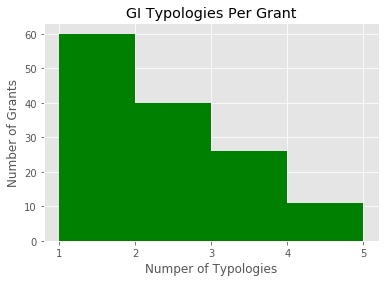

In [20]:
#Graphing results

just_green['total_typologies'].plot(kind='hist',bins=[1,2,3,4,5],xticks=[1,2,3,4,5],color='green')

plt.title('GI Typologies Per Grant')
plt.ylabel('Number of Grants')
plt.xlabel('Numper of Typologies')

plt.show()

In [21]:
#Regressing award amount by number of typologies
X = just_green['total_typologies']
y = just_green['Award ']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Award    R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.1608
Date:                Mon, 20 Aug 2018   Prob (F-statistic):              0.689
Time:                        15:09:46   Log-Likelihood:                -2011.1
No. Observations:                 137   AIC:                             4026.
Df Residuals:                     135   BIC:                             4032.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             7.296e+05   1.08e+05  

### *Location Analysis*
This is a count of the number of times each project location was funded by a grant. Each project was categorized as one location. Projects that were design only or for non-GI were dropped.

In [22]:
#Since there was only one location per project, the location was listed in a single field instead of a binary variable
#Thus, dummies for each location first need to be created 

pre_dummied_dataset = just_green[['Award ','Year','Location','Permeable_Pavements','Bioretention','Green_Roofs',
                                  'Street_Trees','Restoration_Floodplains','Stream_Daylighting','Downspout_Disconnection',
                                  'Stormwater_Harvesting ','Unspecified_GI']]
dummied_dataset = pd.get_dummies(pre_dummied_dataset,prefix='Location') 
dummied_dataset.head()

,Award,Year,Permeable_Pavements,Bioretention,Green_Roofs,Street_Trees,Restoration_Floodplains,Stream_Daylighting,Downspout_Disconnection,Stormwater_Harvesting,...,Location_Citywide,Location_Commercial Building,Location_Design,Location_Institutional Building,Location_Open Space,Location_Parking,Location_Public Building,Location_Residential Building,Location_Road,Location_Waterbody
0,1100000,2016,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1750000,2016,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,1480000,2016,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,1380000,2016,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,800000,2016,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [23]:
#Printing columns to extract the locations
dummied_dataset.columns

Index(['Award ', 'Year', 'Permeable_Pavements', 'Bioretention', 'Green_Roofs',
       'Street_Trees', 'Restoration_Floodplains', 'Stream_Daylighting',
       'Downspout_Disconnection', 'Stormwater_Harvesting ', 'Unspecified_GI',
       'Location_Citywide', 'Location_Commercial Building', 'Location_Design',
       'Location_Institutional Building', 'Location_Open Space',
       'Location_Parking', 'Location_Public Building',
       'Location_Residential Building', 'Location_Road', 'Location_Waterbody'],
      dtype='object')

In [24]:
#Renaming the columns
dummied_dataset.columns = ['Award ','Year','Permeable_Pavements','Bioretention','Green_Roofs','Street_Trees',
                           'Restoration_Floodplains','Stream_Daylighting','Downspout_Disconnection','Stormwater_Harvesting ',
                           'Unspecified_GI','Citywide','Commercial_Building','Design','Institutional_Building','Open_Space',
                           'Parking','Public_Building','Residential_Building','Road','Waterbody']

In [25]:
#Extracting locations into a list
project_locations = ['Citywide','Commercial_Building','Institutional_Building','Open_Space','Parking','Public_Building',
                     'Residential_Building','Road','Waterbody']

In [26]:
#Iterating over the list to count the occurence of each location
location_count = {}

for location in project_locations:
    count = dummied_dataset[location].sum()
    location_count[location] = count

location_count = pd.DataFrame.from_dict(location_count,orient='index')
location_count.columns = ['Count']
location_count = location_count.sort_values(by=['Count'])
location_count

,Count
Open_Space,1
Residential_Building,4
Public_Building,9
Citywide,10
Commercial_Building,11
Parking,22
Waterbody,22
Institutional_Building,25
Road,32


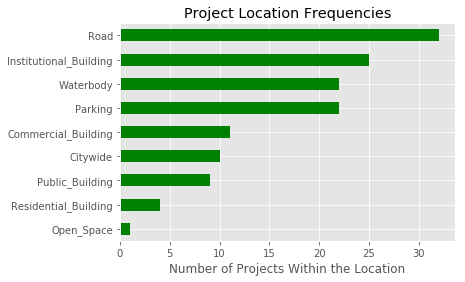

In [27]:
#Graphing results
location_count.plot(kind='barh',color='green',legend=None)
 
plt.xlabel('Number of Projects Within the Location')
plt.title('Project Location Frequencies')

plt.show()

In [28]:
#Calculating the percent of projects using each typology
location_count['Percent'] = round(((location_count['Count'] / 137) * 100),2)
location_count

,Count,Percent
Open_Space,1,0.73
Residential_Building,4,2.92
Public_Building,9,6.57
Citywide,10,7.30
Commercial_Building,11,8.03
Parking,22,16.06
Waterbody,22,16.06
Institutional_Building,25,18.25
Road,32,23.36


In [29]:
#Regressing award amount by location
X = dummied_dataset[project_locations]
y = dummied_dataset['Award ']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Award    R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     2.317
Date:                Mon, 20 Aug 2018   Prob (F-statistic):             0.0190
Time:                        15:09:54   Log-Likelihood:                -2000.8
No. Observations:                 137   AIC:                             4022.
Df Residuals:                     127   BIC:                             4051.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    4.7

### *Big Regression*
This is a final regression combining all variables considered above.

In [30]:
dummied_dataset.columns

Index(['Award ', 'Year', 'Permeable_Pavements', 'Bioretention', 'Green_Roofs',
       'Street_Trees', 'Restoration_Floodplains', 'Stream_Daylighting',
       'Downspout_Disconnection', 'Stormwater_Harvesting ', 'Unspecified_GI',
       'Citywide', 'Commercial_Building', 'Design', 'Institutional_Building',
       'Open_Space', 'Parking', 'Public_Building', 'Residential_Building',
       'Road', 'Waterbody'],
      dtype='object')

In [31]:
X = dummied_dataset[['Year','Permeable_Pavements','Bioretention','Green_Roofs','Street_Trees','Restoration_Floodplains',
                     'Stream_Daylighting','Downspout_Disconnection','Stormwater_Harvesting ','Unspecified_GI',
                     'Commercial_Building','Institutional_Building','Parking','Public_Building','Residential_Building',
                     'Road','Waterbody']]
y = dummied_dataset['Award ']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Award    R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     1.901
Date:                Mon, 20 Aug 2018   Prob (F-statistic):             0.0240
Time:                        15:09:56   Log-Likelihood:                -1994.7
No. Observations:                 137   AIC:                             4025.
Df Residuals:                     119   BIC:                             4078.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -1